## 패키지

In [2]:
import pandas as pd

In [3]:
import geopandas as gpd

import fiona #공간데이터를 딕셔너리 형태 등으로 접근할 수 있는 라이브러리 
from fiona.crs import from_epsg # 좌표변환 

import pyproj  # 좌표변환
from pyproj import Proj, transform

import shapely
from shapely.geometry.multipolygon import MultiPolygon 
from shapely.geometry import LineString, Point
from shapely import wkt

## 데이터 로딩

### CCTV 데이터 (포인트)

In [4]:
# "전국CCTV표준데이터" CSV 파일 로딩 
df_cctv = pd.read_csv('./data/전국CCTV표준데이터.csv', encoding="EUC-KR", header=0, 
                           names=['admin_nm', 'addr_rd', 'addr_jb', 'purpose', 'cctv_cnt', 'pixel', 'direction', 'period', 'date_install', 'tel', 'lat', 'lon', 'date_make', 'offer_admin_cd', 'offer_admin_nm'], 
                           dtype={'cctv_cnt':object, 'pixel':object, 'period':object, 'lat':float, 'lon':float, 'offer_admin_cd':object}, 
                  thousands = ',', #천단위 쉼표 제거   
                  index_col=None) 

In [5]:
df_cctv.dropna(subset=['lat'],axis=0,inplace=True)  #거리 비교를 위해 null 삭제
df_cctv.dropna(subset=['lon'],axis=0,inplace=True)  #거리 비교를 위해 null 삭제
df_cctv.dropna(subset=['addr_rd'],axis=0,inplace=True) # 도로명주소 nulll 데이터 삭제
df_cctv.dropna(subset=['addr_jb'],axis=0,inplace=True) #지번주소 null 데이터 삭제 

In [6]:
df_cctv_sl = df_cctv[ df_cctv['admin_nm'].str.contains('서울특별시') == True ]
df_cctv_sl.info()
df_cctv_sl.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6029 entries, 86 to 49546
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   admin_nm        6029 non-null   object 
 1   addr_rd         6029 non-null   object 
 2   addr_jb         6029 non-null   object 
 3   purpose         6029 non-null   object 
 4   cctv_cnt        6029 non-null   object 
 5   pixel           5357 non-null   object 
 6   direction       3466 non-null   object 
 7   period          5856 non-null   object 
 8   date_install    5611 non-null   object 
 9   tel             6029 non-null   object 
 10  lat             6029 non-null   float64
 11  lon             6029 non-null   float64
 12  date_make       6029 non-null   object 
 13  offer_admin_cd  6029 non-null   object 
 14  offer_admin_nm  6029 non-null   object 
dtypes: float64(2), object(13)
memory usage: 753.6+ KB


,admin_nm,addr_rd,addr_jb,purpose,cctv_cnt,pixel,direction,period,date_install,tel,lat,lon,date_make,offer_admin_cd,offer_admin_nm
86,서울특별시 영등포구,"선유로13길 25,서울영문초등학교 사거리앞",선유로13길 25,생활방범,3,NaN,360도 전방면,30,2018-08,02-2670-4067,37.519353,126.886960,2020-05-06,3180000,서울특별시 영등포구
87,서울특별시 영등포구,"문래로4길 4,현대2차APT 202동 옆 서부간선도로 사잇길 육교앞",문래로4길 4,생활방범,2,NaN,360도 전방면,30,2018-08,02-2670-4067,37.520178,126.882110,2020-05-06,3180000,서울특별시 영등포구
88,서울특별시 영등포구,"선유로9나길 22,사거리앞",문래동5가 12 사거리앞,생활방범,3,NaN,360도 전방면,30,2018-08,02-2670-4067,37.515876,126.886114,2020-05-06,3180000,서울특별시 영등포구
89,서울특별시 영등포구,경인로94길 9-13,문래동1가 2-6,생활방범,3,NaN,360도 전방면,30,2018-08,02-2670-4067,37.514473,126.903631,2020-05-06,3180000,서울특별시 영등포구
90,서울특별시 영등포구,"선유서로 31,현대6차APT 602동 근처 창대교회 사거리앞",문래동6가 55-1 현대6차APT 602동 근처 창대감리교회 사거리앞,생활방범,1,NaN,360도 전방면,30,2018-08,02-2670-4067,37.518936,126.883318,2020-05-06,3180000,서울특별시 영등포구


In [7]:
# 좌표 속성을 가지고 지오메트리 데이터를 생성
geom_cctv_sl01 = gpd.points_from_xy(df_cctv_sl.lon, df_cctv_sl.lat)

In [8]:
# 기존의 데이터프레임 컬럼명을 가져옴 
columns = df_cctv_sl.columns

In [9]:
# 속성 데이터프레임에 Geometry를 붙여서 공간 데이터프레임을 생성 
gdf_cctv_sl01 = gpd.GeoDataFrame(df_cctv_sl[columns], geometry=geom_cctv_sl01, crs=from_epsg(4326))

C:\Users\dhl\AppData\Roaming\Python\Python38\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [10]:
gdf_cctv_sl01.info()
gdf_cctv_sl01.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 6029 entries, 86 to 49546
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   admin_nm        6029 non-null   object  
 1   addr_rd         6029 non-null   object  
 2   addr_jb         6029 non-null   object  
 3   purpose         6029 non-null   object  
 4   cctv_cnt        6029 non-null   object  
 5   pixel           5357 non-null   object  
 6   direction       3466 non-null   object  
 7   period          5856 non-null   object  
 8   date_install    5611 non-null   object  
 9   tel             6029 non-null   object  
 10  lat             6029 non-null   float64 
 11  lon             6029 non-null   float64 
 12  date_make       6029 non-null   object  
 13  offer_admin_cd  6029 non-null   object  
 14  offer_admin_nm  6029 non-null   object  
 15  geometry        6029 non-null   geometry
dtypes: float64(2), geometry(1), object(13)
memory usag

,admin_nm,addr_rd,addr_jb,purpose,cctv_cnt,pixel,direction,period,date_install,tel,lat,lon,date_make,offer_admin_cd,offer_admin_nm,geometry
86,서울특별시 영등포구,"선유로13길 25,서울영문초등학교 사거리앞",선유로13길 25,생활방범,3,NaN,360도 전방면,30,2018-08,02-2670-4067,37.519353,126.886960,2020-05-06,3180000,서울특별시 영등포구,POINT (126.88696 37.51935)
87,서울특별시 영등포구,"문래로4길 4,현대2차APT 202동 옆 서부간선도로 사잇길 육교앞",문래로4길 4,생활방범,2,NaN,360도 전방면,30,2018-08,02-2670-4067,37.520178,126.882110,2020-05-06,3180000,서울특별시 영등포구,POINT (126.88211 37.52018)
88,서울특별시 영등포구,"선유로9나길 22,사거리앞",문래동5가 12 사거리앞,생활방범,3,NaN,360도 전방면,30,2018-08,02-2670-4067,37.515876,126.886114,2020-05-06,3180000,서울특별시 영등포구,POINT (126.88611 37.51588)
89,서울특별시 영등포구,경인로94길 9-13,문래동1가 2-6,생활방범,3,NaN,360도 전방면,30,2018-08,02-2670-4067,37.514473,126.903631,2020-05-06,3180000,서울특별시 영등포구,POINT (126.90363 37.51447)
90,서울특별시 영등포구,"선유서로 31,현대6차APT 602동 근처 창대교회 사거리앞",문래동6가 55-1 현대6차APT 602동 근처 창대감리교회 사거리앞,생활방범,1,NaN,360도 전방면,30,2018-08,02-2670-4067,37.518936,126.883318,2020-05-06,3180000,서울특별시 영등포구,POINT (126.88332 37.51894)


In [11]:
# 좌표계 조회
gdf_cctv_sl01.crs
#gdf_cctv_sl01.crs = "epsg:4326"

<Geographic 2D CRS: +init=epsg:4326 +no_defs +type=crs>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [12]:
# GeoPandas를 이용하여 공간DataFrmae을 SHP으로 저장
gdf_cctv_sl01.to_file('./data/gdf_cctv_sl.shp', encoding='utf-8')
# geojson으로 저장
gdf_cctv_sl01.to_file("./data/gdf_cctv_sl.geojson", driver='GeoJSON', encoding='utf-8')

### 행정동경계 (폴리곤)

In [13]:
# shp 로딩
gdf_dong = gpd.read_file('./data/gdf_dong.shp', encoding='utf-8') 
gdf_dong.info()
gdf_dong.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3492 entries, 0 to 3491
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   OBJECTID  3492 non-null   int64   
 1   adm_nm    3492 non-null   object  
 2   adm_cd    3492 non-null   object  
 3   adm_cd2   3492 non-null   object  
 4   sgg       3492 non-null   object  
 5   sido      3492 non-null   object  
 6   sidonm    3492 non-null   object  
 7   sggnm     3492 non-null   object  
 8   geometry  3492 non-null   geometry
dtypes: geometry(1), int64(1), object(7)
memory usage: 245.7+ KB


,OBJECTID,adm_nm,adm_cd,adm_cd2,sgg,sido,sidonm,sggnm,geometry
0,1,서울특별시 종로구 사직동,1101053,1111053000,11110,11,서울특별시,종로구,"POLYGON ((126.97689 37.57565, 126.97703 37.569..."
1,2,서울특별시 종로구 삼청동,1101054,1111054000,11110,11,서울특별시,종로구,"POLYGON ((126.98269 37.59507, 126.98337 37.594..."
2,3,서울특별시 종로구 부암동,1101055,1111055000,11110,11,서울특별시,종로구,"POLYGON ((126.97585 37.59656, 126.97359 37.593..."
3,4,서울특별시 종로구 평창동,1101056,1111056000,11110,11,서울특별시,종로구,"POLYGON ((126.97507 37.63139, 126.97649 37.630..."
4,5,서울특별시 종로구 무악동,1101057,1111057000,11110,11,서울특별시,종로구,"POLYGON ((126.96067 37.58080, 126.96281 37.579..."


In [14]:
gdf_dong_sl = gdf_dong[ gdf_dong['sido'] == '11' ]
gdf_dong_sl.info()
gdf_dong_sl.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 425 entries, 0 to 3474
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   OBJECTID  425 non-null    int64   
 1   adm_nm    425 non-null    object  
 2   adm_cd    425 non-null    object  
 3   adm_cd2   425 non-null    object  
 4   sgg       425 non-null    object  
 5   sido      425 non-null    object  
 6   sidonm    425 non-null    object  
 7   sggnm     425 non-null    object  
 8   geometry  425 non-null    geometry
dtypes: geometry(1), int64(1), object(7)
memory usage: 33.2+ KB


,OBJECTID,adm_nm,adm_cd,adm_cd2,sgg,sido,sidonm,sggnm,geometry
0,1,서울특별시 종로구 사직동,1101053,1111053000,11110,11,서울특별시,종로구,"POLYGON ((126.97689 37.57565, 126.97703 37.569..."
1,2,서울특별시 종로구 삼청동,1101054,1111054000,11110,11,서울특별시,종로구,"POLYGON ((126.98269 37.59507, 126.98337 37.594..."
2,3,서울특별시 종로구 부암동,1101055,1111055000,11110,11,서울특별시,종로구,"POLYGON ((126.97585 37.59656, 126.97359 37.593..."
3,4,서울특별시 종로구 평창동,1101056,1111056000,11110,11,서울특별시,종로구,"POLYGON ((126.97507 37.63139, 126.97649 37.630..."
4,5,서울특별시 종로구 무악동,1101057,1111057000,11110,11,서울특별시,종로구,"POLYGON ((126.96067 37.58080, 126.96281 37.579..."


In [15]:
# 좌표계 조회
gdf_dong_sl.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

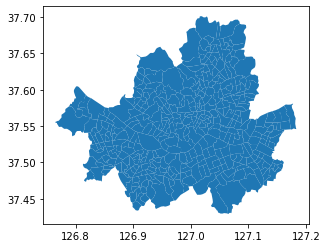

In [17]:
gdf_dong_sl.plot()

#### 구 코드로 Dissolve하여 구 단위의 구역 생성

https://geopandas.org/aggregation_with_dissolve.html    

https://www.earthdatascience.org/workshops/gis-open-source-python/dissolve-polygons-in-python-geopandas-shapely/  

In [77]:
gdf_gu_sl = gdf_dong_sl.dissolve(by='sgg')
gdf_gu_sl.info()
gdf_gu_sl.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 25 entries, 11110 to 11740
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   geometry  25 non-null     geometry
 1   OBJECTID  25 non-null     int64   
 2   adm_nm    25 non-null     object  
 3   adm_cd    25 non-null     object  
 4   adm_cd2   25 non-null     object  
 5   sido      25 non-null     object  
 6   sidonm    25 non-null     object  
 7   sggnm     25 non-null     object  
dtypes: geometry(1), int64(1), object(6)
memory usage: 2.3+ KB


,geometry,OBJECTID,adm_nm,adm_cd,adm_cd2,sido,sidonm,sggnm
sgg,,,,,,,,
11110,"POLYGON ((126.96905 37.56819, 126.96801 37.567...",1,서울특별시 종로구 사직동,1101053,1111053000,11,서울특별시,종로구
11140,"POLYGON ((127.01631 37.55301, 127.01321 37.549...",18,서울특별시 중구 소공동,1102052,1114052000,11,서울특별시,중구
11170,"POLYGON ((126.98249 37.51351, 126.98014 37.512...",33,서울특별시 용산구 후암동,1103051,1117051000,11,서울특별시,용산구
11200,"POLYGON ((127.06283 37.54019, 127.05657 37.529...",49,서울특별시 성동구 왕십리2동,1104052,1120052000,11,서울특별시,성동구
11215,"POLYGON ((127.09225 37.52679, 127.09044 37.526...",66,서울특별시 광진구 화양동,1105053,1121571000,11,서울특별시,광진구


<AxesSubplot:>

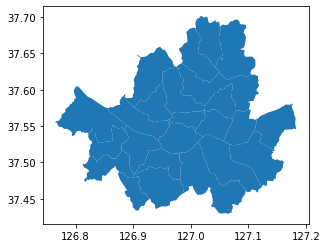

In [78]:
gdf_gu_sl.plot()

## 공간조인

In [79]:
# 서울 행정동에 CCTV 포인트를 공간조인 
gdf_gu_cctv_sl = gpd.sjoin(gdf_gu_sl, gdf_cctv_sl01) 
gdf_gu_cctv_sl.info()
gdf_gu_cctv_sl.head()

C:\Users\dhl\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: +init=epsg:4326 +no_defs +type=crs

  


<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 6015 entries, 11110 to 11740
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   geometry        6015 non-null   geometry
 1   OBJECTID        6015 non-null   int64   
 2   adm_nm          6015 non-null   object  
 3   adm_cd          6015 non-null   object  
 4   adm_cd2         6015 non-null   object  
 5   sido            6015 non-null   object  
 6   sidonm          6015 non-null   object  
 7   sggnm           6015 non-null   object  
 8   index_right     6015 non-null   int64   
 9   admin_nm        6015 non-null   object  
 10  addr_rd         6015 non-null   object  
 11  addr_jb         6015 non-null   object  
 12  purpose         6015 non-null   object  
 13  cctv_cnt        6015 non-null   object  
 14  pixel           5343 non-null   object  
 15  direction       3453 non-null   object  
 16  period          5842 non-null   object  
 17  date_i

,geometry,OBJECTID,adm_nm,adm_cd,adm_cd2,sido,sidonm,sggnm,index_right,admin_nm,...,pixel,direction,period,date_install,tel,lat,lon,date_make,offer_admin_cd,offer_admin_nm
sgg,,,,,,,,,,,,,,,,,,,,,
11110,"POLYGON ((126.96905 37.56819, 126.96801 37.567...",1,서울특별시 종로구 사직동,1101053,1111053000,11,서울특별시,종로구,10216,서울특별시 성북구청,...,130,360도전방면,30,2014-12,02-2241-4562,37.581392,127.008212,2020-10-01,3070000,서울특별시 성북구
11110,"POLYGON ((126.96905 37.56819, 126.96801 37.567...",1,서울특별시 종로구 사직동,1101053,1111053000,11,서울특별시,종로구,10218,서울특별시 성북구청,...,200,360도전방면,30,2014-12,02-2241-4562,37.582812,127.007490,2020-10-01,3070000,서울특별시 성북구
11140,"POLYGON ((127.01631 37.55301, 127.01321 37.549...",18,서울특별시 중구 소공동,1102052,1114052000,11,서울특별시,중구,9474,서울특별시 중구청,...,200,회전형,30,2013-02,02-3396-4744,37.554152,127.007411,2020-06-25,3010000,서울특별시 중구
11140,"POLYGON ((127.01631 37.55301, 127.01321 37.549...",18,서울특별시 중구 소공동,1102052,1114052000,11,서울특별시,중구,9472,서울특별시 중구청,...,200,회전형,30,2016-12,02-3396-4744,37.554333,127.008293,2020-06-25,3010000,서울특별시 중구
11140,"POLYGON ((127.01631 37.55301, 127.01321 37.549...",18,서울특별시 중구 소공동,1102052,1114052000,11,서울특별시,중구,9473,서울특별시 중구청,...,200,회전형,30,2014-11,02-3396-4744,37.554333,127.008293,2020-06-25,3010000,서울특별시 중구


In [80]:
# 구별로 CCTV 갯수 집계
df_gu_cctv_sl2 = gdf_gu_cctv_sl.groupby(['sgg'], as_index=False ).size().reset_index()  
df_gu_cctv_sl2.info()
df_gu_cctv_sl2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   22 non-null     int64 
 1   sgg     22 non-null     object
 2   size    22 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 656.0+ bytes


,index,sgg,size
0,0,11110,2
1,1,11140,55
2,2,11170,1
3,3,11200,438
4,4,11230,173


In [81]:
# 구 폴리곤에 집계값을 속성 조인 
gdf_gu_cctv_sl2 = pd.merge(gdf_gu_sl, df_gu_cctv_sl2, on='sgg', how='left')
gdf_gu_cctv_sl2.info()
gdf_gu_cctv_sl2.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 25 entries, 0 to 24
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   sgg       25 non-null     object  
 1   geometry  25 non-null     geometry
 2   OBJECTID  25 non-null     int64   
 3   adm_nm    25 non-null     object  
 4   adm_cd    25 non-null     object  
 5   adm_cd2   25 non-null     object  
 6   sido      25 non-null     object  
 7   sidonm    25 non-null     object  
 8   sggnm     25 non-null     object  
 9   index     22 non-null     float64 
 10  size      22 non-null     float64 
dtypes: float64(2), geometry(1), int64(1), object(7)
memory usage: 2.3+ KB


,sgg,geometry,OBJECTID,adm_nm,adm_cd,adm_cd2,sido,sidonm,sggnm,index,size
0,11110,"POLYGON ((126.96905 37.56819, 126.96801 37.567...",1,서울특별시 종로구 사직동,1101053,1111053000,11,서울특별시,종로구,0.0,2.0
1,11140,"POLYGON ((127.01631 37.55301, 127.01321 37.549...",18,서울특별시 중구 소공동,1102052,1114052000,11,서울특별시,중구,1.0,55.0
2,11170,"POLYGON ((126.98249 37.51351, 126.98014 37.512...",33,서울특별시 용산구 후암동,1103051,1117051000,11,서울특별시,용산구,2.0,1.0
3,11200,"POLYGON ((127.06283 37.54019, 127.05657 37.529...",49,서울특별시 성동구 왕십리2동,1104052,1120052000,11,서울특별시,성동구,3.0,438.0
4,11215,"POLYGON ((127.09225 37.52679, 127.09044 37.526...",66,서울특별시 광진구 화양동,1105053,1121571000,11,서울특별시,광진구,NaN,NaN


In [82]:
# 구별 경계를 geojson으로 저장
gdf_gu_cctv_sl2.to_file("./data/gdf_gu_cctv_sl2.geojson", driver='GeoJSON', encoding='utf-8')

만들어진 geojson은 아래 사이트에서 확인해볼 수 있습니다.   
https://mapshaper.org/ 

In [83]:
import json

with open('./data/gdf_gu_cctv_sl2.geojson', encoding='utf-8') as f:

    json_data = json.load(f)

In [84]:
print(json_data)

{'type': 'FeatureCollection', 'crs': {'type': 'name', 'properties': {'name': 'urn:ogc:def:crs:OGC:1.3:CRS84'}}, 'features': [{'type': 'Feature', 'properties': {'sgg': '11110', 'OBJECTID': 1, 'adm_nm': '서울특별시 종로구 사직동', 'adm_cd': '1101053', 'adm_cd2': '1111053000', 'sido': '11', 'sidonm': '서울특별시', 'sggnm': '종로구', 'index': 0.0, 'size': 2.0}, 'geometry': {'type': 'Polygon', 'coordinates': [[[126.96904837001854, 37.568194417708334], [126.96801027119919, 37.56718251422151], [126.96792521742005, 37.56709695369099], [126.96733567672948, 37.56650376640693], [126.96729746629627, 37.56646554636408], [126.96719305150863, 37.56636085699477], [126.96713423029, 37.56630119278387], [126.96718646998274, 37.566255827643815], [126.96677353826367, 37.56579436403003], [126.9658121875202, 37.56666901462727], [126.96189826008306, 37.57065058360019], [126.9595707378107, 37.572961218450786], [126.95392395620553, 37.578490716235244], [126.95355601666945, 37.57887566580948], [126.95416175053352, 37.5788987485408

In [85]:
#!pip install folium

In [86]:
import folium
import mapclassify as mc

In [96]:
bins = list(gdf_gu_cctv_sl2['size'].quantile([0, 0.25, 0.5, 0.75, 1]))

# Initialize the map:
m = folium.Map(
    location=[37.58, 126.97], 
    zoom_start=11,
    tiles='Stamen Toner'
#     width=1024,
#     height=600
)
 
# Add the color for the chloropleth:
folium.Choropleth(
    geo_data=json_data,
#    name='choropleth',
    data=gdf_gu_cctv_sl2,
    columns=['sgg', 'size'],
    key_on='feature.properties.sgg',
    fill_color='BuPu',   #'BuPu', YlGn
    fill_opacity=0.7,
    line_opacity=0.1,
    legend_name='구별 CCTV 갯수',
    bins=bins,
    reset=True    
).add_to(m)
 
# Save to html
m
#m.save('./result/cctv_map_sl.html')

#### Folium 특징  
https://python-visualization.github.io/folium/   

- leaflet.js를 파이썬 환경에서 쓸 수 있도록 만든 패키지  
- 일반 웹지도와 같이 확대/축소/이동 등이 가능
- 배경지도 지원  
OpenStreetMap  
Stamen Terrain  
Stamen Toner  
Stamen Watercolor  
CartoDB positron  
CartoDB dark_matter  

#### Folium 구현 요약  
- 도형은 geojson으로, 속성은 dataframe으로 적용해야 함  
- 도형과 속성 양쪽에 공통 Key 항목이 있어야 함  

In [ ]:
folium.Choropleth(
    geo_data = "지도 데이터 파일 경로 (.geojson, geopandas.DataFrame)"
    data = "시각화 하고자 하는 데이터파일. (pandas.DataFrame)"
    columns = (geo_data와 data 조인 컬럼명, 시각화할 숫자형 컬럼),
    key_on = "feature.데이터 파일과 매핑할 값-geojson에서 key 컬럼",
    fill_color = "시각화에 쓰일 색상",
    legend_name = "칼라 범주 이름",
).add_to(m)

#### Folium 참조  
https://dailyheumsi.tistory.com/144 

#### 단계구분도의 색상 scheme(배색)
https://matplotlib.org/tutorials/colors/colormaps.html 

https://colorbrewer2.org/#type=sequential&scheme=BuGn&n=3  


#### 단계구분의 단계 구분 모드  
- equal_interval : 등간격
- QUANTILES      : 분위수
- Fisher_Jenks   : Natural Break

https://brunch.co.kr/@mapmatters/3

https://guzene.tistory.com/320  

https://m.blog.naver.com/flyproject/222035218795

In [49]:
#import pysal as ps  #pip install pysal 또는 !pip install pysal (주피터)

<AxesSubplot:>

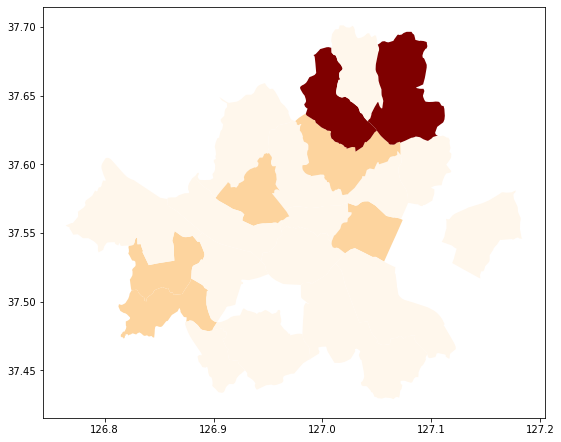

In [89]:
gdf_gu_cctv_sl2.plot(column='size', scheme='equal_interval', k=5, cmap='OrRd', figsize=(9, 9))

<AxesSubplot:>

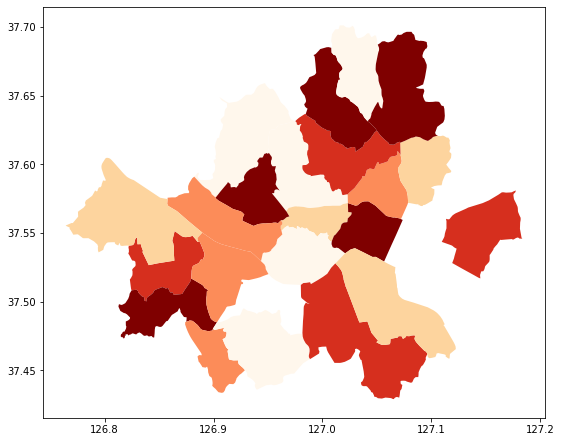

In [90]:
gdf_gu_cctv_sl2.plot(column='size', scheme='QUANTILES', k=5, cmap='OrRd', figsize=(9, 9))

<AxesSubplot:>

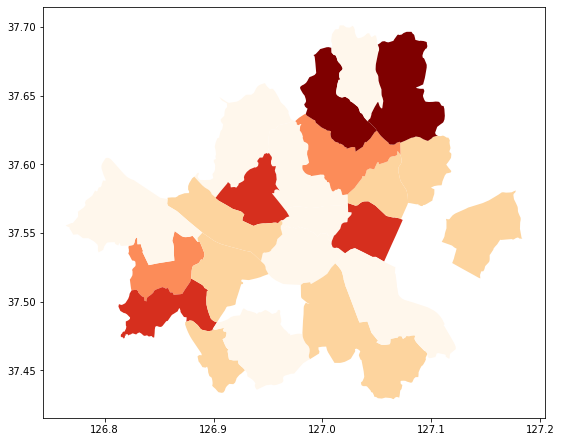

In [91]:
gdf_gu_cctv_sl2.plot(column='size', scheme='Fisher_Jenks', k=5, cmap='OrRd', figsize=(9, 9))

## 속성조인

In [28]:
#cctv 포인트 데이터 재확인
gdf_cctv_sl01.info()
gdf_cctv_sl01.head(2)

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 6029 entries, 86 to 49546
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   admin_nm        6029 non-null   object  
 1   addr_rd         6029 non-null   object  
 2   addr_jb         6029 non-null   object  
 3   purpose         6029 non-null   object  
 4   cctv_cnt        6029 non-null   object  
 5   pixel           5357 non-null   object  
 6   direction       3466 non-null   object  
 7   period          5856 non-null   object  
 8   date_install    5611 non-null   object  
 9   tel             6029 non-null   object  
 10  lat             6029 non-null   float64 
 11  lon             6029 non-null   float64 
 12  date_make       6029 non-null   object  
 13  offer_admin_cd  6029 non-null   object  
 14  offer_admin_nm  6029 non-null   object  
 15  geometry        6029 non-null   geometry
dtypes: float64(2), geometry(1), object(13)
memory usag

,admin_nm,addr_rd,addr_jb,purpose,cctv_cnt,pixel,direction,period,date_install,tel,lat,lon,date_make,offer_admin_cd,offer_admin_nm,geometry
86,서울특별시 영등포구,"선유로13길 25,서울영문초등학교 사거리앞",선유로13길 25,생활방범,3,NaN,360도 전방면,30,2018-08,02-2670-4067,37.519353,126.88696,2020-05-06,3180000,서울특별시 영등포구,POINT (126.88696 37.51935)
87,서울특별시 영등포구,"문래로4길 4,현대2차APT 202동 옆 서부간선도로 사잇길 육교앞",문래로4길 4,생활방범,2,NaN,360도 전방면,30,2018-08,02-2670-4067,37.520178,126.88211,2020-05-06,3180000,서울특별시 영등포구,POINT (126.88211 37.52018)


In [29]:
#데이터 타입 변환
gdf_cctv_sl01['cctv_cnt'] = gdf_cctv_sl01['cctv_cnt'].astype(int)

In [30]:
# admin_nm 항목이 같은 기준으로 cctv_cnt의 숫자들을 합산
df_cctv_sum01 = gdf_cctv_sl01.groupby(['admin_nm'])['cctv_cnt'].agg('sum').reset_index() 
df_cctv_sum01.info()
df_cctv_sum01.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   admin_nm  19 non-null     object
 1   cctv_cnt  19 non-null     int32 
dtypes: int32(1), object(1)
memory usage: 356.0+ bytes


,admin_nm,cctv_cnt
0,서울특별시 강남구청,90
1,서울특별시 강동구청,461
2,서울특별시 강북경찰서,24
3,서울특별시 강북구청,1144
4,서울특별시 강서구,131


In [31]:
# admin_nm 항목이 같은 기준으로 레코드 건수 집계
df_cctv_sum02 = gdf_cctv_sl01.groupby(['admin_nm'], as_index=False ).size().reset_index()  
df_cctv_sum02.info()
df_cctv_sum02.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   index     19 non-null     int64 
 1   admin_nm  19 non-null     object
 2   size      19 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 584.0+ bytes


,index,admin_nm,size
0,0,서울특별시 강남구청,31
1,1,서울특별시 강동구청,238
2,2,서울특별시 강북경찰서,24
3,3,서울특별시 강북구청,1144
4,4,서울특별시 강서구,100


In [34]:
# 행정구역 코드 체계가 달라서 코드 매칭이 안됨. 행정구역 명칭으로 속성조인을 해보자
df_cctv_sum01['admin_nm']

0       서울특별시 강남구
1       서울특별시 강동구
2     서울특별시 강북경찰서
3       서울특별시 강북구
4       서울특별시 강서구
5       서울특별시 구로구
6       서울특별시 금천구
7       서울특별시 노원구
8      서울특별시 동대문구
9       서울특별시 마포구
10     서울특별시 서대문구
11      서울특별시 성동구
12      서울특별시 성북구
13      서울특별시 양천구
14     서울특별시 영등포구
15      서울특별시 은평구
16       서울특별시 중구
17      서울특별시 중랑구
18      서울특별시_서초구
Name: admin_nm, dtype: object

In [33]:
#구 명칭에 붙어있는 '청' 제거
df_cctv_sum01.admin_nm = df_cctv_sum01.admin_nm.str.replace('청', '')

In [16]:
#구 경계 재확인
gdf_gu_sl.head()

,geometry,OBJECTID,adm_nm,adm_cd,adm_cd2,sido,sidonm,sggnm
sgg,,,,,,,,
11110,"POLYGON ((126.96905 37.56819, 126.96801 37.567...",1,서울특별시 종로구 사직동,1101053,1111053000,11,서울특별시,종로구
11140,"POLYGON ((127.01631 37.55301, 127.01321 37.549...",18,서울특별시 중구 소공동,1102052,1114052000,11,서울특별시,중구
11170,"POLYGON ((126.98249 37.51351, 126.98014 37.512...",33,서울특별시 용산구 후암동,1103051,1117051000,11,서울특별시,용산구
11200,"POLYGON ((127.06283 37.54019, 127.05657 37.529...",49,서울특별시 성동구 왕십리2동,1104052,1120052000,11,서울특별시,성동구
11215,"POLYGON ((127.09225 37.52679, 127.09044 37.526...",66,서울특별시 광진구 화양동,1105053,1121571000,11,서울특별시,광진구


In [23]:
#구 경계에 "서울특별시 00구"와 같은 형태의 컬럼을 만들자
gdf_gu_sl['admin_nm'] = gdf_gu_sl['sidonm'] + " " + gdf_gu_sl['sggnm']

In [24]:
gdf_gu_sl.head()

,geometry,OBJECTID,adm_nm,adm_cd,adm_cd2,sido,sidonm,sggnm,sigu,admin_nm
sgg,,,,,,,,,,
11110,"POLYGON ((126.96905 37.56819, 126.96801 37.567...",1,서울특별시 종로구 사직동,1101053,1111053000,11,서울특별시,종로구,서울특별시 종로구,서울특별시 종로구
11140,"POLYGON ((127.01631 37.55301, 127.01321 37.549...",18,서울특별시 중구 소공동,1102052,1114052000,11,서울특별시,중구,서울특별시 중구,서울특별시 중구
11170,"POLYGON ((126.98249 37.51351, 126.98014 37.512...",33,서울특별시 용산구 후암동,1103051,1117051000,11,서울특별시,용산구,서울특별시 용산구,서울특별시 용산구
11200,"POLYGON ((127.06283 37.54019, 127.05657 37.529...",49,서울특별시 성동구 왕십리2동,1104052,1120052000,11,서울특별시,성동구,서울특별시 성동구,서울특별시 성동구
11215,"POLYGON ((127.09225 37.52679, 127.09044 37.526...",66,서울특별시 광진구 화양동,1105053,1121571000,11,서울특별시,광진구,서울특별시 광진구,서울특별시 광진구


In [40]:
gdf_gu_sl2 = pd.merge(gdf_gu_sl, df_cctv_sum01, on='admin_nm', how='left')
gdf_gu_sl2.info()
gdf_gu_sl2.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 25 entries, 0 to 24
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   geometry  25 non-null     geometry
 1   OBJECTID  25 non-null     int64   
 2   adm_nm    25 non-null     object  
 3   adm_cd    25 non-null     object  
 4   adm_cd2   25 non-null     object  
 5   sido      25 non-null     object  
 6   sidonm    25 non-null     object  
 7   sggnm     25 non-null     object  
 8   sigu      25 non-null     object  
 9   admin_nm  25 non-null     object  
 10  cctv_cnt  17 non-null     float64 
dtypes: float64(1), geometry(1), int64(1), object(8)
memory usage: 2.3+ KB


,geometry,OBJECTID,adm_nm,adm_cd,adm_cd2,sido,sidonm,sggnm,sigu,admin_nm,cctv_cnt
0,"POLYGON ((126.96905 37.56819, 126.96801 37.567...",1,서울특별시 종로구 사직동,1101053,1111053000,11,서울특별시,종로구,서울특별시 종로구,서울특별시 종로구,NaN
1,"POLYGON ((127.01631 37.55301, 127.01321 37.549...",18,서울특별시 중구 소공동,1102052,1114052000,11,서울특별시,중구,서울특별시 중구,서울특별시 중구,143.0
2,"POLYGON ((126.98249 37.51351, 126.98014 37.512...",33,서울특별시 용산구 후암동,1103051,1117051000,11,서울특별시,용산구,서울특별시 용산구,서울특별시 용산구,NaN
3,"POLYGON ((127.06283 37.54019, 127.05657 37.529...",49,서울특별시 성동구 왕십리2동,1104052,1120052000,11,서울특별시,성동구,서울특별시 성동구,서울특별시 성동구,1387.0
4,"POLYGON ((127.09225 37.52679, 127.09044 37.526...",66,서울특별시 광진구 화양동,1105053,1121571000,11,서울특별시,광진구,서울특별시 광진구,서울특별시 광진구,NaN


In [44]:
# 구별 경계를 geojson으로 저장
gdf_gu_sl2.to_file("./data/gdf_gu_sl2.geojson", driver='GeoJSON', encoding='utf-8')

만들어진 geojson은 아래 사이트에서 확인해볼 수 있습니다.   
https://mapshaper.org/ 

In [46]:
import json

with open('./data/gdf_gu_sl2.geojson', encoding='utf-8') as f:

    json_data2 = json.load(f)

In [47]:
bins = list(gdf_gu_sl2['cctv_cnt'].quantile([0, 0.25, 0.5, 0.75, 1]))

# Initialize the map:
m = folium.Map(
    location=[37.58, 126.97], 
    zoom_start=11,
    tiles='Stamen Toner'
#     width=1024,
#     height=600
)
 
# Add the color for the chloropleth:
folium.Choropleth(
    geo_data=json_data2,
#    name='choropleth',
    data=gdf_gu_sl2,
    columns=['sggnm', 'cctv_cnt'],
    key_on='feature.properties.sggnm',
    fill_color='BuPu',   #'BuPu', YlGn
    fill_opacity=0.7,
    line_opacity=0.1,
    legend_name='구별 CCTV 갯수',
    bins=bins,
    reset=True    
).add_to(m)
 
# Save to html
m
#m.save('./result/cctv_map_sl.html')

공간조인과 비교해봤을 때
속성상으로는 CCTV 자료가 없는 구에 좌표 오차로 인해 카운트가 된 구들이 있는 것으로 보여집니다.